C:\Users\YouWont4GetMe\Anaconda3\lib\site-packages\ipykernel_launcher.py:229: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
TRUE
Completed K means clustering for 4 number of centroids!


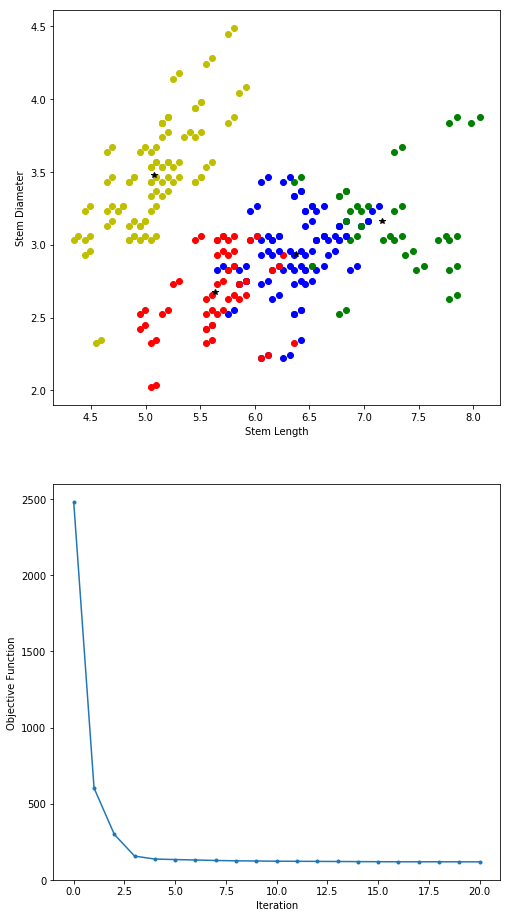

In [2]:
# importing modules  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import math

class k_means:
    
    def __init__(self, data_set):
        self.data_set = data_set
    
    # intialises the first iteration of the centroid assignment 
    def initialise_centroids(self,dataset, K):
    
        # data gets randomised 
        np.random.shuffle(dataset)

        # centroids array stores K amount against the number of features (4)
        centroids = np.zeros((K, 4))
        
        # selects the top k ampount to be the first iterations centroid assignment 
        # loops through the amount of K
        for i in range(K):
            
            # for each feature (4) 
            for features in range(4):
                
                # stores the centroids from top of the data set to the centroid array
                centroids[i,features] = dataset[i,features]
                
        #Return
        return centroids
    
    
    # calculates the distance of two vectors (euclidean distance)
    def compute_euclidean_distance(self, dataset, Centroids):
        
        # size of the centroid 
        centroid_size = Centroids.shape[0]
        
        # new arry to store the distance, creates by the length of the data in rows and centroid size of columsn
        data_centroid_size_distance = np.zeros (((len(dataset)),centroid_size))
        
        #for the amount of data
        for _data in range(len(dataset)):
            #for the amount of centroids
            for _centroid in range((centroid_size)):
                
                # distance for plants
                # loops through centrid i which iterates 0- 4 for addding up the below equation for each distance
                # Equation is Sqaure root(datapoint feature - centroid of feature)^2 
                for centroid_i in range(4):
                    data_centroid_size_distance[_data, _centroid] = data_centroid_size_distance[_data, _centroid] + (dataset[_data,centroid_i] - Centroids[_centroid,centroid_i])**2
                
                # square roots the added up distances 
                data_centroid_size_distance[_data, _centroid] = math.sqrt(data_centroid_size_distance[_data, _centroid]) 
        
        datset_size = dataset.shape[0]
        # array for storing centroids to the data set 
        Centroid_assign_data = np.zeros((dataset.shape[0]))

        summed_list = 0.0
        # for all data length (how many samples we have)
        # for each peice of data for the length of the data set 
        for single_data in range(datset_size):

            # dist stores the centroid distances from the selected single_data
            dist = data_centroid_size_distance [single_data,:]

            # applies the minium distance to the index which is the closest centoird 
            min_distance = np.argmin(dist)

            summed_list += np.min(dist)**2

            # minium distance for each centoird is applied to each data point
            Centroid_assign_data[single_data] = min_distance

        # returns the centroid assignement for all data  
        # returns the distance 
        return data_centroid_size_distance, Centroid_assign_data, summed_list
    
    
    # calculates the average centroid for the new iteration, used within the k mean while loop
    def Avergae_Centroids(self,K, dataset, Centroid_assign_data):

        # centroids array stores K amount against the number of features (4)
        new_Centroids = np.zeros((K,4))

        # size of the data set 
        dataset_size = dataset.shape[0]

        # for each centroid in K
        for centroid_K in range(K):

                    # counter used for applying average
                    avg_count = 0

                    # array for each feature 
                    features = [0,0,0,0]

                    # each single data in the size of the data set
                    for single_data in range(dataset_size):

                            # checks if the centroid assignment is == K
                            # used to count the number for each centroid_K
                            if (Centroid_assign_data[single_data] == centroid_K):

                                # avg_count incremenets (used later for average calculation)
                                avg_count+= 1

                                # for each data point == K add to each feature array
                                for i in range(4):
                                    features[i]+= dataset[single_data,i]

                    # for each centroid calculation of new mean using avg_count 
                    for i in range(4):

                        # each cendroid for each feature is given a new value
                        new_Centroids[centroid_K,i] = features[i]/avg_count

        # new vavlues for centroids 
        return new_Centroids

    
    def plot_data(self,Centroid_assign_data, centroids_, K, dist_sums, no_iteration):
        # plots the data in a 2 dimentional plot for visualisation of data 
        plt.figure(figsize=(8,16))
        plt.subplot(2, 1, 1)
        plt.xlabel("Stem Length")
        plt.ylabel("Stem Diameter")

        size_centroid_assignement = Centroid_assign_data.shape[0]

        # loops through the size of the cluser assignment array
        for i in range(size_centroid_assignement):
            # produces a plot on the graph of colour red for centroid 0
            if Centroid_assign_data[i,4] == 0:
                plt.plot(Centroid_assign_data[i,0],Centroid_assign_data[i,1], 'ro')
                    # produces a plot on the graph of colour blue for centroid 1
            if Centroid_assign_data[i,4] == 1:
                plt.plot(Centroid_assign_data[i,0],Centroid_assign_data[i,1], 'bo')
            # produces a plot on the graph of colour Yellow for centroid 2
            if Centroid_assign_data[i,4] == 2:
                plt.plot(Centroid_assign_data[i,0],Centroid_assign_data[i,1], 'yo') 
                # produces a plot on the graph of colour green for centroid 3
            if Centroid_assign_data[i,4] == 3:
                plt.plot(Centroid_assign_data[i,0],Centroid_assign_data[i,1], 'go')  

        # plots the K size centroids
        for centroid_k in range(K):
            plt.plot(centroids_[centroid_k,0],centroids_[centroid_k,1], 'k*')


        t = list(range(no_iteration))

        plt.subplot(2, 1, 2)
        plt.plot(t, dist_sums, '.-')
        plt.xlabel('Iteration')
        plt.ylabel('Objective Function')

        plt.show()
    
    
    # Calculates the K menas after intialisation
    def kmeans(self, data_set, K): 
        # FIRST ITERATION INTIALISATION 
        # requires randomising of the data set + data very unlikely to match on first iteration
        #--------------------------------------------------------------------------------------------------
        #--------------------------------------------------------------------------------------------------
        dataset = self.data_set

        dist_sums = []
        
        # Initialise Centroids - First Time select random Data Points
        Centroids = self.initialise_centroids(dataset, K)
        
        # calculates the distance from each centroid to data and assigns a new centroid 
        data_centroid_size_distance, Centroid_assign_data, summed_dist = self.compute_euclidean_distance(data_set, Centroids)

        dist_sums.append(summed_dist)
        
        #--------------------------------------------------------------------------------------------------
        #--------------------------------------------------------------------------------------------------

        no_iteration = 1
        loop = 0
        _iterate_K_means = True
        # Start While loop
        while loop == 0:
            
            # prints the iteration number 
            print(no_iteration)
            
            # new centroids are creates through averages from the previous data 
            Centroids = self.Avergae_Centroids(K, dataset, Centroid_assign_data)

            # copy saved for comparision to check if completed 
            PrevoisCentroidAssignmet = Centroid_assign_data
            
            # calculates the distance from each centroid to data and assigns a new centroid 
            data_centroid_size_distance, Centroid_assign_data, summed_dist = self.compute_euclidean_distance(data_set, Centroids)
            
            # checks to see if K means complete, only when previous and new centroid_assign_data is equal is complete 
            if (np.array_equal(PrevoisCentroidAssignmet, Centroid_assign_data)):
                print("TRUE")
                break
                
            # calculates the number of iterations taken    
            no_iteration+=1
            dist_sums.append(summed_dist)
    
        # completed centroid assignment when no changes were found 
        print("Completed K means clustering for "+str(K)+" number of centroids!")
        
        # adds an addition column to the array stating which centroid the each data set belongs to
        Cluster_Assigned = np.column_stack((data_set,Centroid_assign_data))
        
        #--------------------------------------------------------------------------------------------------
        #--------------------------------------------------------------------------------------------------
        
        
        # Return the centroids and Assigned Clustered dataset
        return Centroids, Cluster_Assigned, dist_sums, no_iteration  
    
# Python .py files Main method call
def main():
    # read in data to a dataframe 
    data_set = pd.DataFrame.from_csv('CMP3744M_ADM_Assignment 1_Task2 - dataset - plants.csv', index_col = None).values

    # setting the K means value 
    K = 4
    
    #setup the class for k-means
    kmeans = k_means(data_set)
    # k means produces centroids and the cluster assigned for each centroid
    Centroids, Centroid_assign_data, dist_sums, no_iteration  = kmeans.kmeans(data_set, K)

    # fucntion for plotting the cluster assignment on a 2d plan for all 4 clusters around no. K centroids
    kmeans.plot_data(Centroid_assign_data, Centroids, K, dist_sums, no_iteration)
    
    
if __name__ == "__main__":
    main()